In [9]:
library(gtools)
if (!require("DESeq2")) {
  install.packages("DESeq2", dependencies = TRUE)
  library(DESeq2)
}

# filePath <- '/data/shangzhong//DE//Winzeler//pberg_counts'
# filePath <- getwd()
filePath <- '/data/julie/FDA_RNA_Seq/htseq'
setwd(filePath)
DE_file <- list.files(filePath,pattern='\\.txt$')
DE_file <- mixedsort(DE_file)

sampleFiles <- c(DE_file)
sampleCondition <- c('B4_00_un','B4_0h_EM','B4_6h_EM','B4_24h_EM','B4_2d_EM','B4_3d_EM','B4_4d_EM','B4_7d_EM',
                     'B12_00_un','B12_0h_EM','B12_6h_EM','B12_24h_EM','B12_2d_EM','B12_3d_EM','B12_4d_EM','B12_7d_EM',
                     'C4_00_un','C4_0h_EM','C4_6h_EM','C4_24h_EM','C4_2d_EM','C4_3d_EM','C4_4d_EM','C4_7d_EM',
                     'B4_00_un','B4_0h_REO','B4_6h_REO','B4_24h_REO','B4_2d_REO','B4_3d_REO','B4_4d_REO','B4_7d_REO',
                     'B12_00_un','B12_0h_REO','B12_6h_REO','B12_24h_REO','B12_2d_REO','B12_3d_REO','B12_4d_REO','B12_7d_REO',
                     'C4_00_un','C4_0h_REO','C4_6h_REO','C4_24h_REO','C4_2d_REO','C4_3d_REO','C4_4d_REO','C4_7d_REO')
                     
sampleNames <- sampleFiles
cellLine <- rep(c(rep('B4',8),rep('B12',8),rep('C4',8)),2)
virus <- c('B4_un',rep('EMCV',7),'B12_un',rep('EMCV',7),'C4_un',rep('EMCV',7),
           'B4_un',rep('REO',7),'B12_un',rep('REO',7),'C4_un',rep('REO',7))
time <- rep(c('bf','0h','6h','24h','d2','d3','d4','d7'),6)
response <- c(rep('no',8),rep('yes',8),rep('no',8),rep('no',8),rep('no',8),rep('yes',8))


sampleTable <- data.frame(sampleName=sampleNames,filename=sampleFiles,condition=sampleCondition,
                          clone=cellLine,virus=virus,time=time,response=response)

In [10]:
# design <- model.matrix(~clone+virus+time+response,sampleTable)

ddsHTSeq <- DESeqDataSetFromHTSeqCount(sampleTable=sampleTable,directory=
                                         filePath, design=~condition)

ddsHTSeq <- estimateSizeFactors(ddsHTSeq)
data <- counts(ddsHTSeq,normalized=T)

In [14]:
library("RColorBrewer")
library('ggplot2')
library("gplots")
vsd <- vst(ddsHTSeq,blind=FALSE)
distsRL <- dist(t(assay(vsd)))
mat <- as.matrix(distsRL)
rownames(mat) <- colData(vsd)$condition
colnames(mat) <- colnames(vsd)

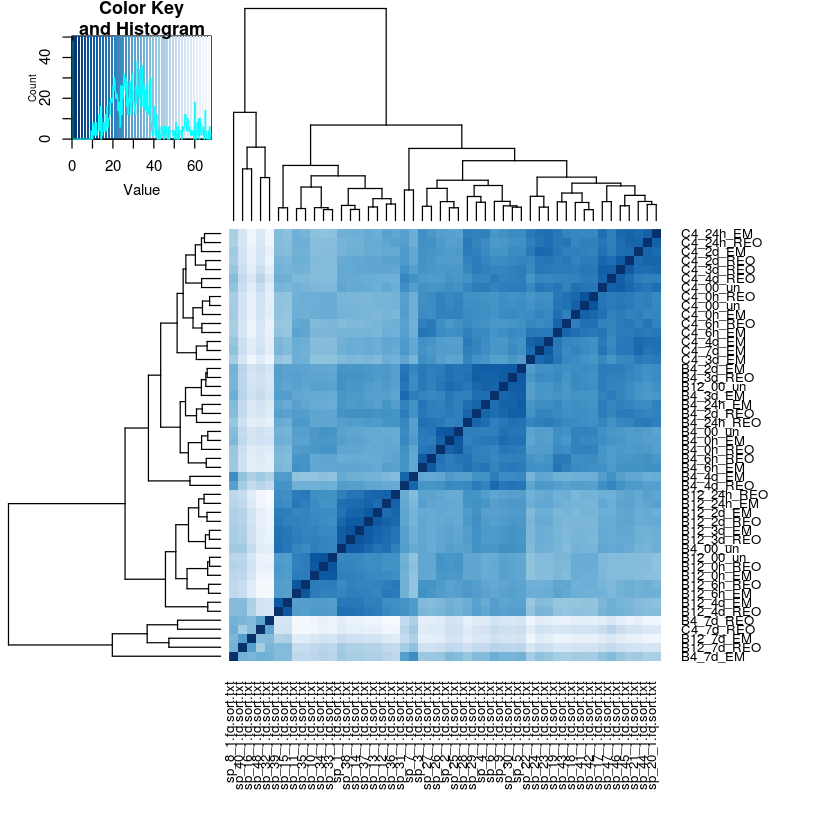

In [15]:
# use vst method
hmcol <- colorRampPalette(brewer.pal(9,"Blues"))(255)
heatmap.2(mat,trace='none',col=rev(hmcol),margin=c(9,9))

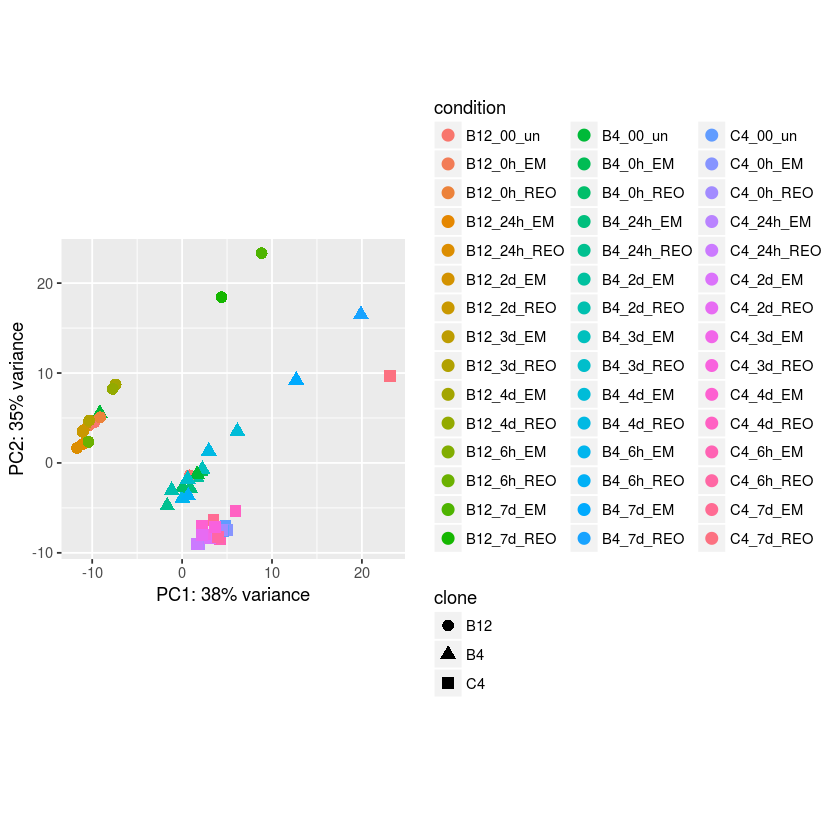

In [16]:
#=========== pca plot 
pcaData <- plotPCA(vsd, intgroup=c("condition",'clone','virus'),returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(PC1, PC2, color=condition, shape=clone)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()

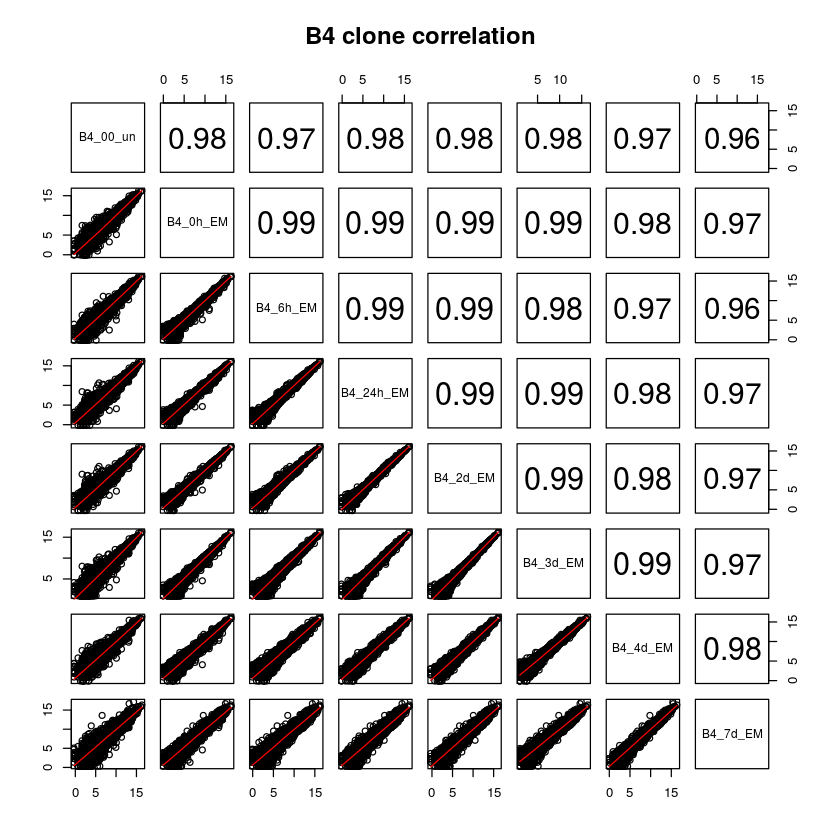

In [24]:
panel.cor <- function(x, y, digits=2, prefix="", cex.cor)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits=digits)[1]
  txt <- paste(prefix, txt, sep="")
  if(missing(cex.cor)) cex <- 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex * r)
}


fil_data <- data[apply(data, 1, function(row) all(row !=0 )),]
colnames(fil_data) <- sampleCondition
pairs(log2(fil_data[,seq(1,8)]+0.01),lower.panel=panel.smooth, upper.panel=panel.cor,
      main='B4 clone correlation')

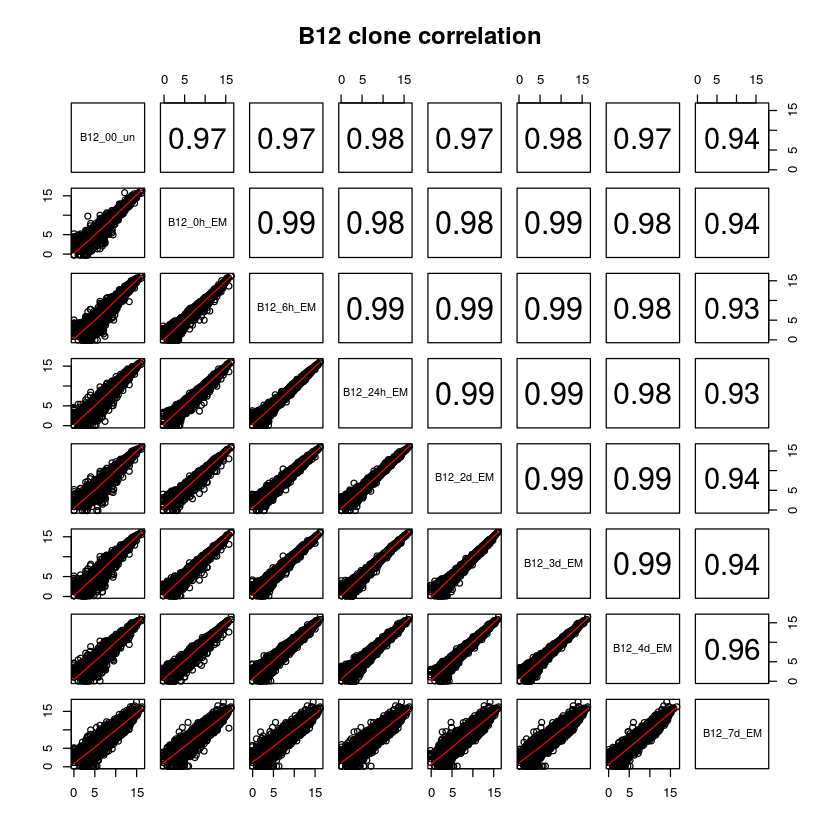

In [25]:
pairs(log2(fil_data[,seq(9,16)]+0.01),lower.panel=panel.smooth, upper.panel=panel.cor,
      main='B12 clone correlation')

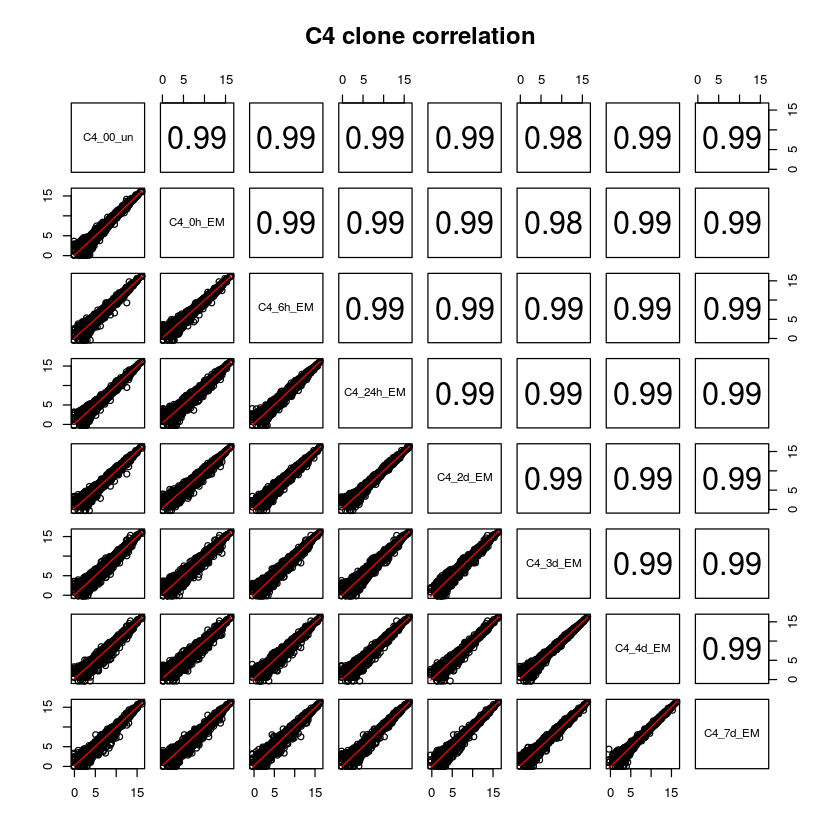

In [26]:
pairs(log2(fil_data[,seq(17,24)]+0.01),lower.panel=panel.smooth, upper.panel=panel.cor,
      main='C4 clone correlation')

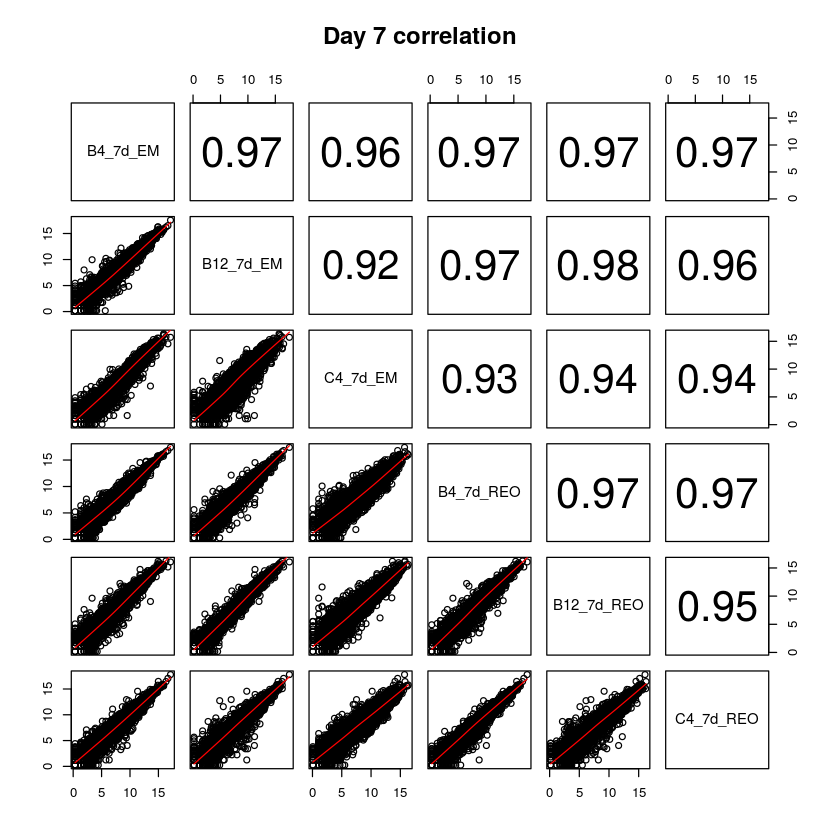

In [27]:
pairs(log2(fil_data[,c(8,16,24,32,40,48)]+0.01),lower.panel=panel.smooth, upper.panel=panel.cor,
      main='Day 7 correlation')